# **<h1><center><center>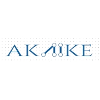</center></center></h1>**

# **<h1><center>Akaike Technologies</center></h1>**
# **<h3><center>NLP Assignment</center></h3>**

# **Problem Statement**


> # **Objective-1**




###For objective-1 using opencv countours to count the Number of Rice Grain


# Importing Requried Library

In [6]:
import cv2                             
import numpy as np
from skimage.segmentation import watershed
from skimage import feature,measure,color
from scipy import ndimage
import matplotlib.pyplot as plt

#**Counting Rice Using Counters**

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


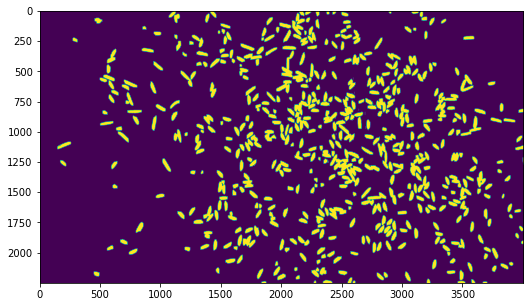

In [7]:
img = cv2.imread('/content/drive/MyDrive/data/test/image_1.jpg')
imggray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
r ,thimg = cv2.threshold(imggray,120,255,cv2.THRESH_BINARY)
morkernel = np.ones((3),np.uint8)
imgmorph = cv2.morphologyEx(thimg,cv2.MORPH_OPEN,morkernel,iterations=8)
plt.figure(figsize=(25,5))
plt.imshow(imgmorph)

Total Rice Grains:  513


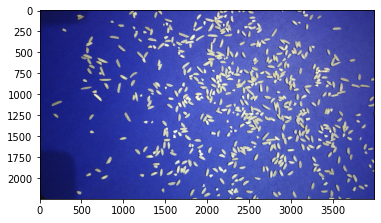

In [8]:
imgcontour = img.copy()
contours, hierarchy = cv2.findContours(imgmorph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
result = cv2.cvtColor(imgcontour, cv2.COLOR_BGR2RGB)
plt.imshow(result)
print("Total Rice Grains: ",len(contours))


# Using Watershed Function We can Solve the counting error 

Total No. of Rice Grains in: 586


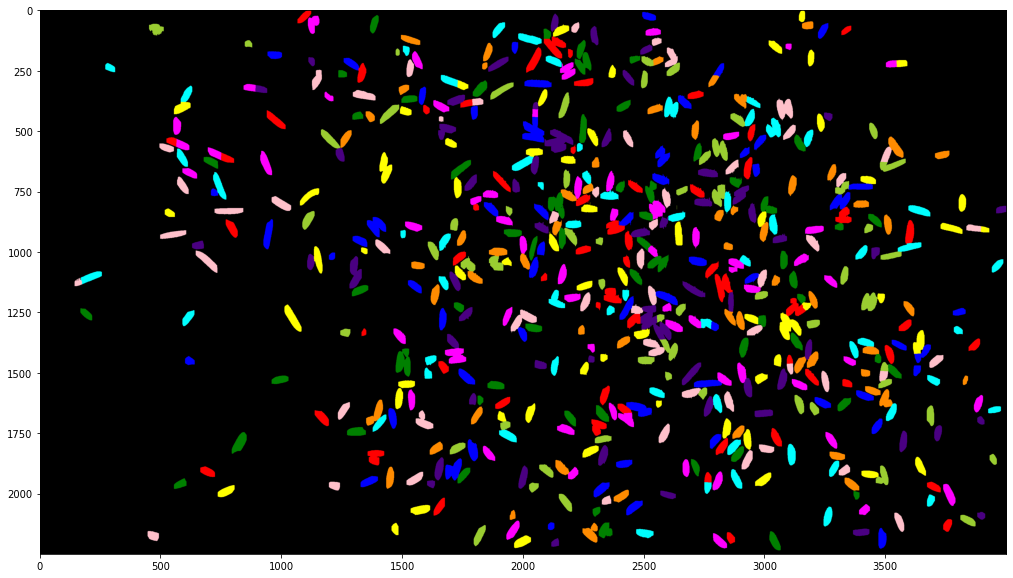

In [9]:
img = cv2.imread('/content/drive/MyDrive/data/test/image_1.jpg')
imggray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
r ,thimg = cv2.threshold(imggray,120,255,cv2.THRESH_BINARY)
morkernel = np.ones((3),np.uint8)
imgmorph = cv2.morphologyEx(thimg,cv2.MORPH_OPEN,morkernel,iterations=8)
dist = ndimage.distance_transform_edt(imgmorph) #It returns closest background element to each foreground element.
lm = feature.peak_local_max(dist,min_distance=23) #It returns the peaks values in an image(array) as coordinate list
lmm = np.zeros(dist.shape,dtype=bool)             #It returns the distance shape of zeros value array 
lmm[tuple(lm.T)] = True
wash = watershed(-dist,measure.label(lmm),mask = imgmorph) #Passing the parameters into watershed function
plt.figure(figsize=(50,10))
show = color.label2rgb(wash, bg_label=0)
plt.imshow(show)
print('Total No. of Rice Grains in:',wash.max())

After appling the watershed algorithm touching of rice grains separted as single object, Taking maximum value of array of watershed the count of grains is obtained, by calibrating the min_distance value can increase more accuracy.

###Objective-2: For second objective by finding the area of the broken rice countour. 

In [10]:
brokenrice = []
contours, hierarchy = cv2.findContours(imgmorph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
  area = cv2.contourArea(cnt)
  if area < 800 :
    brokenrice.append(cnt)
print('No. of Broken Rice Grains:',len(brokenrice))

No. of Broken Rice Grains: 87


Taking the area of contour by using the countourArea function iterating the for all the contours and for broken rice calibrated value is less than 800 and added value in the list. Finally by applying the length function for broken_rice list finded the Broken_rice count in the image.

Same Program here iterating throught the all images in test folder printing the results.

In [ ]:
import cv2                             
import numpy as np
from skimage.segmentation import watershed
from skimage import feature,measure,color
from scipy import ndimage
import matplotlib.pyplot as plt
import os
import pandas as pd
#drive path
path_to_data = "/content/drive/MyDrive/data/"

images_path="/content/drive/MyDrive/data/test/"
broken_rice_count=[] 
full_rice_count=[]
img_dirs = []
for entry in os.scandir(path_to_data):
    img_dirs.append(entry.path)
    print(entry.path)

image_dir=[]
for ob in os.scandir(images_path):
  image_dir.append(ob)       
print(img_dirs)
file_n=[]
print("file_n ",file_n)
def broken_rice(imgmorph):
    brokenrice = []
    contours, hierarchy = cv2.findContours(imgmorph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
      area = cv2.contourArea(cnt)   
      if area < 800 :
        brokenrice.append(cnt)
         
    total=len(brokenrice)   
    print('No. of Broken Rice Grains  is :',total)
    broken_rice_count.append(total)
   

def full_rice(image_path):
    #print(image_path)
    img = cv2.imread(image_path)
    imggray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    r ,thimg = cv2.threshold(imggray,120,255,cv2.THRESH_BINARY)
    morkernel = np.ones((3),np.uint8)
    imgmorph = cv2.morphologyEx(thimg,cv2.MORPH_OPEN,morkernel,iterations=8)
   
    dist = ndimage.distance_transform_edt(imgmorph) #It returns closest background element to each foreground element.
    lm = feature.peak_local_max(dist,min_distance=23) #It returns the peaks values in an image(array) as coordinate list
    lmm = np.zeros(dist.shape,dtype=bool)             #It returns the distance shape of zeros value array 
    lmm[tuple(lm.T)] = True
    wash = watershed(-dist,measure.label(lmm),mask = imgmorph) #Passing the parameters into watershed function
    plt.figure(figsize=(50,10))
    show = color.label2rgb(wash, bg_label=0)
    plt.imshow(show)
    total=wash.max()
    print(f'Total No. of Rice Grains in {image_path} is :',total)
    full_rice_count.append(total)
        
    broken_rice(imgmorph)
for img_dir in img_dirs:
    count = 1
    
      
    
for entry in os.scandir(img_dir):
   roi_color = full_rice(entry.path)
   
print(full_rice_count)
print(broken_rice_count)
print(image_dir)  



            

# **Saving as CSV**

In [ ]:
data = {
    "file_name":image_dir,
  "total_rice_grain":full_rice_count,
  "total_broken_rice":broken_rice_count
}
df = pd.DataFrame(data)

print(df) 



In [32]:
df.to_csv('/content/drive/MyDrive/data/submission.csv')

# **Conclusion**

# *Thanks for Akaike Technologies giving me such an opportunities to learn new things about Open CV . After Finishing this Assignment I have Gained More Knowledge about Object counting using watershed and Counters*

Thanking Akaike for giving this assignments , I learned lot of new things from this assignments.

**Done By Srirangan K**

**Btech Artifical Intelligence And DataScience**


LinkedIn : [Srirangan's LinkedIn](https://www.linkedin.com/in/srirangan-kannan-31jul2002/
)

My Resume : [Srirangan's Resume](https://drive.google.com/file/d/1Zlb9Fu9CTTc4VeU6tHn-dTG7punb7Vs2/view?usp=share_link)